# 규제 선형 모델

비용함수는 학습 데이터의 잔차 오류값을 최소로하는 RSS 최소화 방법과 과적합 방지를 위해 회귀계수 값이 커지지 않도록 하는 방법이 균형을 이루어야 한다.

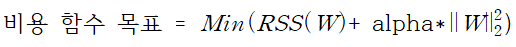


* alpha : 학습 데이터 적합 정도와 회귀 계수 값의 크기 제어를 수행하는 튜닝 파라미터
    * alpha = 0(또는 매우 작은 값) : Min(RSS(W) + 0) -> RSS 최소화 -> W값이 켜저도 어느 정도 상쇄 가능하여 적합 개선
    * alpha = 무한대(또는 매우 큰 값) : Min(RSS(W) + alpha * ||W||2 -> W를 최소화(0 또는 매우 작은 값) -> 과적합 개선


* 규제 : 비용함수에 alpha 값으로 패널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식
    * L2 규제 : alpha * ||W||2 (W 제곱에 패널티 부여) -> 릿지(Ridge) 회귀
    * L1 규제 : alpha * ||W||1 (W 절대값에 패널티 부여) -> 라쏘(Lasso) 회귀(영향력이 크지 않은 회귀 계수 값을 0으로 변환)

# 릿지 회귀

* Ridge 클래스의 주요 생성 파라미터 alpha : alpha L2 규제 계수

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge

boston = load_boston()

ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, boston.data, boston.target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores :', np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores :', np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds 의 개별 Negative MSE scores : [-11.42 -24.29 -28.14 -74.6  -28.52]
5 folds 의 개별 RMSE scores : [3.38 4.93 5.31 8.64 5.34]
5 folds 의 평균 RMSE : 5.518


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

릿지의 5개 폴드 세트의 평균 RMSE가 5.518로 LinearRegression의 RMSE 평균인 5.829보다 더 뛰어난 예측 성능을 보인다.

In [2]:
# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse 를 구함
for alpha in alphas:
    ridge = Ridge(alpha=alpha)

    # cross_val_score를 이용해 5개의 폴드 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, boston.data, boston.target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5 folds의 평균 RMSE : 5.829
alpha 0.1 일 때 5 folds의 평균 RMSE : 5.788
alpha 1 일 때 5 folds의 평균 RMSE : 5.653
alpha 10 일 때 5 folds의 평균 RMSE : 5.518
alpha 100 일 때 5 folds의 평균 RMSE : 5.330


alpha가 100일 때 평균 RMSE가 5.330으로 가장 좋다. 

In [3]:
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

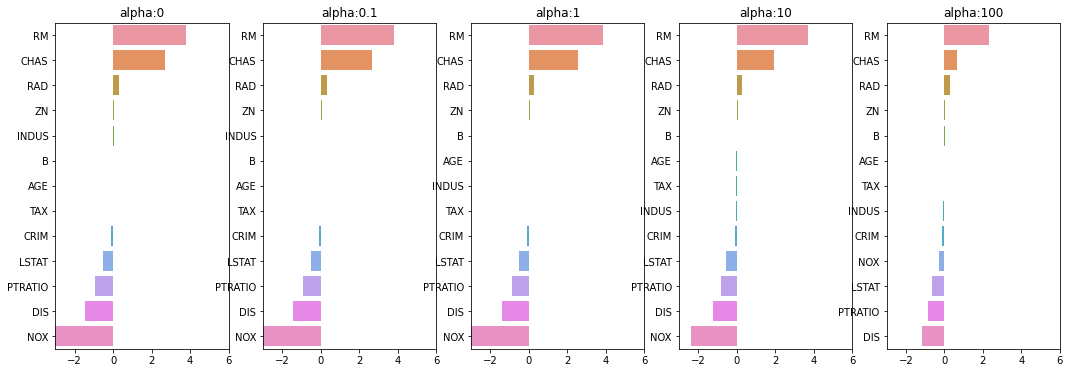

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# 각 alpha에 따른 회귀 계수 값을 시각화 하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, ax = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    # alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    ax[pos].set_title(colname)
    ax[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=ax[pos])
# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

alpha값이 증가할수록 회귀 계수 값은 지속적으로 작아진다. 특히 NOX 피처의 경우 alpha 값이 증가될수록 회귀 계수가 크게 작아지고 있다.

In [5]:
sort_column = 'alpha:'+str(alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


# 라쏘 회귀

W의 절대값에 패널티를 부여하는 L1 규제를 선형 회귀에 적용한 것이 라쏘 회귀이다.

즉 L1 규제는 alpha * ||W||1를 의미하며, 라쏘 회귀 비용함수의 목표는 RSS(W) + alpha * ||W||1 식을 최소화하는 W를 찾는 것이다.

L1 규제는 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거 => 적절만 피쳐만 회귀에 포함시키는 피처 선택의 특정을 가지고 있다.

* 파라미터 : alpha -> L1 규제 계수

In [6]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose:
        print('###### ', model_name, '######')
    for param in params:
        if model_name == "Ridge": model = Ridge(alpha=param)
        elif model_name == "Lasso": model = Lasso(alpha=param)
        elif model_name == "ElasticNet": model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE : {1:.3f}'.format(param, avg_rmse))
        # cross_val_score는 evaluation metric 만 반환하므로 모델을 다시 학습하여 회귀 계수 추출

        model.fit(X_data_n, y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
            coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname = 'alpha:'+str(param)
            coeff_df[colname]=coeff
    return coeff_df
# end of get_linear_regre_eval

alpha값은 [0.07, 0.1, 0.5, 1, 3]로 입력. get_linear_reg_eval()에 모델명을 'Lasso'로 입력하면 라쏘 모델 기반으로 수행.

In [7]:
# 라쏘에 사용될 alpha 파라미터의 값을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

######  Lasso ######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE : 5.612
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.615
alpha 0.5일 때 5 폴드 세트의 평균 RMSE : 5.669
alpha 1일 때 5 폴드 세트의 평균 RMSE : 5.776
alpha 3일 때 5 폴드 세트의 평균 RMSE : 6.189


alpha가 0.07일 때 5.612로 가장 좋은 평균 RMSE를 보인다. 릿지 평균 5.518보다는 약간 떨어지는 수치지만, LinearRegression 평균인 5.829보다는 향상되었다.

In [8]:
# 반환된 coeff_lasso_df를 첫 번째 칼럼순으로 내림차순 정렬해 회귀꼐수 DataFrame 출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


alpha의 크기가 증가함에 따라 일부 피처의 회귀 계수가 0으로 바뀌는 것을 볼 수 있다. 

NOX의 경우 처음부터 회귀 계수가 0이고, INDUS, CHAS와 같은 속성의 회귀 계수는 alpha를 증가시키면서 0으로 바뀐다. 회귀 계수가 0인 피처는 회귀 식에서 제외되면서 피처 선택의 효과를 얻을 수 있다.

# 엘라스틱넷 회귀

* L1 규제와 L2 규제를 결합한 회귀
    * 엘라스틱넷 회귀의 목표는 RSS(W) + alpha2 * ||W||^2 + alpha1 * ||W||1 식을 최소화하는 W를 찾는 것.

엘라스틱넷은 라쏘 회귀가 서로 상관관계가 높은 피처들의 경우에 이들 중에서 중요 피처만을 셀렉션하고 다른 피처들은 모두 회귀 계수를 0으로 만드는 성향을 가져, alpha 값에 따라 회귀 계수의 값이 급격히 변동할 수 있다는 단점을 완화하기 위해 라쏘 회귀를 추가한 것.

* L1과 L2 규제가 결합된 규제로 수행 시간이 상대적으로 오래 걸린다.
* 파라미터 : alpha와 l1_ratio
    * 엘라스틱넷의 규제 = a * L1 + b * L2
    * alpha = a+b => a = L1 규제의 alpha 값 / b = L2 규제의 alpha 값
    * l1_ratio = a / (a + b), l1_ratio가 0이면 a가 0이므로 L2규제와 동일, l1_ratio가 1이면 b가 0이므로 L1 규제와 동일

In [9]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정 (model = ElasticNet(alpha=param, l1_ratio=0.7))
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

######  ElasticNet ######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE : 5.542
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.526
alpha 0.5일 때 5 폴드 세트의 평균 RMSE : 5.467
alpha 1일 때 5 폴드 세트의 평균 RMSE : 5.597
alpha 3일 때 5 폴드 세트의 평균 RMSE : 6.068


In [10]:
# 반호나된 coeff_elastic_df를 첫 번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


alpha 0.5일 때 RMSE가 5.467로 가장 좋은 예측 성능을 보이고 있다. alpha 값에 따른 피처들의 회귀 계수들 값이 라쏘보다는 상대적으로 0이 되는 값이 적은 것을 알 수 있다.

# 선형 회귀 모델을 위한 데이터 변환

* 피처와 타깃값 간에 선형 관계 가정
* 피처값과 타깃값의 분포가 정규 분포를 따른다고 가정 -> 데이터가 심하게 왜곡되었을 경우, 스케일링 및 정규화 수행 필요

1. StandardScaler 클래스를 이용해 평균이 0, 분산이 1인 표준 평균 분포를 가진 데이터 세트로 변환 또는 MinMaxScaler 클래스를 이용해 최솟값이 0이고 최댓값이 1인 값으로 정규화 => 예측 성능 향상 기대하기 어려움

2. 1을 수행한 후 예측 성능 향상이 없을 경우, 스케일링/정규화를 수행한 데이터 세트에 다항 특성을 적용하여 변환 => 과적합 문제 발생 가능

3. log 함수를 적용한 로그 변환. 정규 분포에 가까운 형태로 값이 분포된다. 가장 많이 사용되는 방법.

In [11]:
# method는 표준 정규 분포 변환(Standard), 최댓값/최솟값 정규화(MinMax), 로그 변환(Log) 결정
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

# p_degree는 다항식 특성을 추가할 때 적용, p_degree는 2이상 부여하지 않는다
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
    
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
    return scaled_data

In [12]:
# Ridge의 alpha 값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출
alpha = [0.1, 1, 10, 100]

# 5개의 방식으로 변환, 먼저 원본 그대로, 표준정규 분포, 표준정규 분포 + 다항 특성
# 최대/최소 정규화, 최대/최소 정규화 + 다항 특성, 로그 변환
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    x_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], input_data=X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=x_data_scaled, y_target_n=y_target, verbose=False, return_coeff=False)


## 변환 유형:None, Polynomial Degree:None
alpha 0일 때 5 폴드 세트의 평균 RMSE : 5.829
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.788
alpha 1일 때 5 폴드 세트의 평균 RMSE : 5.653
alpha 10일 때 5 폴드 세트의 평균 RMSE : 5.518
alpha 100일 때 5 폴드 세트의 평균 RMSE : 5.330

## 변환 유형:Standard, Polynomial Degree:None
alpha 0일 때 5 폴드 세트의 평균 RMSE : 5.829
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.826
alpha 1일 때 5 폴드 세트의 평균 RMSE : 5.803
alpha 10일 때 5 폴드 세트의 평균 RMSE : 5.637
alpha 100일 때 5 폴드 세트의 평균 RMSE : 5.421

## 변환 유형:Standard, Polynomial Degree:2
alpha 0일 때 5 폴드 세트의 평균 RMSE : 160800958734322.594
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 8.827
alpha 1일 때 5 폴드 세트의 평균 RMSE : 6.871


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.14452e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=8.44328e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.54163e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


alpha 10일 때 5 폴드 세트의 평균 RMSE : 5.485
alpha 100일 때 5 폴드 세트의 평균 RMSE : 4.634

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0일 때 5 폴드 세트의 평균 RMSE : 5.829
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.764
alpha 1일 때 5 폴드 세트의 평균 RMSE : 5.465
alpha 10일 때 5 폴드 세트의 평균 RMSE : 5.754
alpha 100일 때 5 폴드 세트의 평균 RMSE : 7.635

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0일 때 5 폴드 세트의 평균 RMSE : 17022199435545.172
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.298
alpha 1일 때 5 폴드 세트의 평균 RMSE : 4.323
alpha 10일 때 5 폴드 세트의 평균 RMSE : 5.185
alpha 100일 때 5 폴드 세트의 평균 RMSE : 6.538

## 변환 유형:Log, Polynomial Degree:None
alpha 0일 때 5 폴드 세트의 평균 RMSE : 4.829
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 4.770
alpha 1일 때 5 폴드 세트의 평균 RMSE : 4.676
alpha 10일 때 5 폴드 세트의 평균 RMSE : 4.836
alpha 100일 때 5 폴드 세트의 평균 RMSE : 6.241
